<a href="https://colab.research.google.com/github/shubham-ai/Dog_Breed_identifier_tfrecord_kaggle_submission/blob/main/Dog_Breed_identifier_tfrecord_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
# 

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions  download -c dog-breed-identification --force

 97% 673M/691M [00:05<00:00, 127MB/s]
100% 691M/691M [00:05<00:00, 129MB/s]


In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

In [ ]:
!cp  /content/dog-breed-identification.zip /content/data
!unzip 'dog-breed-identification.zip' -d /content/data

Archive:  dog-breed-identification.zip
replace /content/data/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

PATH = 'data/train/'
PATH2 = 'data/test/'
IMGS = os.listdir(PATH); IMGS2 = os.listdir(PATH2)
print('There are %i train images and %i test images'%(len(IMGS),len(IMGS2)))
df = pd.read_csv('data/labels.csv')
df.rename({'id':'image_name'},axis=1,inplace=True)
df.head()

There are 10222 train images and 10357 test images


,image_name,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
classes = sorted(list(set(df['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))



#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
print(list(class_to_num.keys())[list(class_to_num.values()).index(19)])


boston_bull



process to make Tensor Record



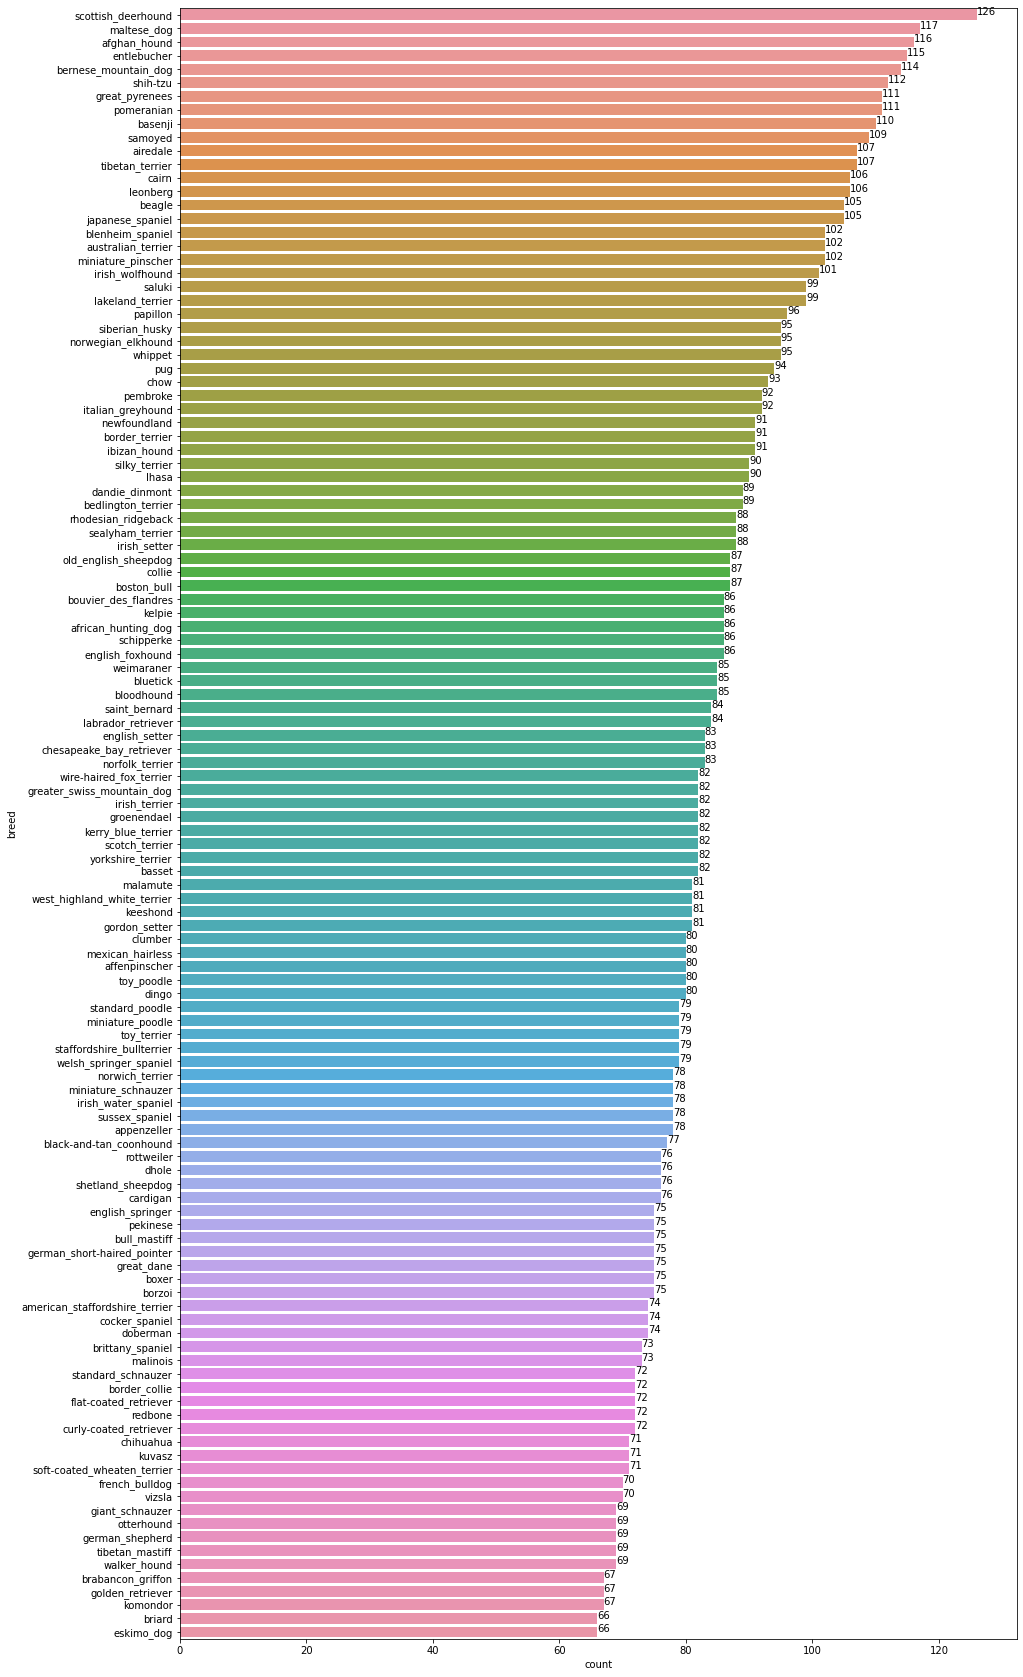

In [ ]:


def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=df['breed'],order=df['breed'].value_counts().index)
barw(ax0)
plt.show()

In [ ]:
x = pd.DataFrame(df['breed'].value_counts())
x.astype('int64').dtypes
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, scottish_deerhound to eskimo_dog
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   breed   120 non-null    int64
dtypes: int64(1)
memory usage: 1.9+ KB


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
# from google.cloud import storage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

AUTO = tf.data.experimental.AUTOTUNE
from PIL import Image
import os
import IPython.display as display
import csv
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import keras.backend as K



In [ ]:
def _bytestring_feature(list_of_bytestrings):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=list_of_bytestrings))

def _int_feature(list_of_ints): # int64
    return tf.train.Feature(int64_list=tf.train.Int64List(value=list_of_ints))

def _float_feature(list_of_floats): # float32
    return tf.train.Feature(float_list=tf.train.FloatList(value=list_of_floats))


def train_parse_function(filename, label):
    print(label)
    img_raw = tf.io.read_file('data/train/' + filename + '.jpg')
    return img_raw, label

def to_tfrecord(tfrec_filewriter, img_bytes, label):
    one_hot_class = [np.eye(120)[label[0]]]
    
    feature = {
        "image": _bytestring_feature([img_bytes]), # one image in the list
        "breed": _int_feature([label[0]]),
        "breed_oh": _float_feature(one_hot_class[0].tolist())
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def TensorRecorrds(df):
    X_train, X_test, y_train, y_test = train_test_split(df.image_name.values, df.breed.values, test_size=0.10, random_state=42, stratify=df[['breed']])
    BATCH_SIZE = 64
    STEPS_PER_EPOCH = len(X_train) // BATCH_SIZE
    VAL_STEPS_PER_EPOCH = len(X_test) // BATCH_SIZE
    train_df = pd.DataFrame()
    train_df['image_name'] = X_train
    train_df['breed'] = y_train
    test_df = pd.DataFrame()
    test_df['image_name'] = X_test
    test_df['breed'] = y_test
    test_df.head()
    label_encoder = LabelEncoder().fit(df.breed.astype(str))
    train_df.breed = label_encoder.transform(train_df.breed.astype(str))
    keys = label_encoder.classes_
    values = label_encoder.transform(label_encoder.classes_)
    dictionary = dict(zip(keys, values))
    label_encoder = LabelEncoder().fit(df.breed.astype(str))
    test_df.breed = label_encoder.transform(test_df.breed.astype(str))


    csv_columns = dictionary.keys() 
    dict_data = [dictionary]

    csv_file = "./classes_mapping.csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in dict_data:
                writer.writerow(data)
    except IOError:
        print("I/O error")

    train_image_paths = train_df['image_name']
    train_labels = train_df[['breed']]

    val_image_paths = test_df['image_name']
    val_labels = test_df[['breed']]

    os.makedirs('data/tfrecords/train/')
    os.makedirs('data/tfrecords/val/')

    tfrecord_train_dir = 'data/tfrecords/train/'
    tfrecord_val_dir = 'data/tfrecords/val/'  


    SHARDS = 144
    nb_images = len(train_df)
    shard_size = math.ceil(1.0 * nb_images / SHARDS)
    print("Pattern matches {} images which will be rewritten as {} .tfrec files containing {} images each.".format(nb_images, SHARDS, shard_size))


    files = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
    dataset = files.map(train_parse_function)
    dataset = dataset.batch(shard_size)


    print("Writing TFRecords")
    for shard, (image, label) in enumerate(dataset):
      # batch size used as shard size here
      shard_size = image.numpy().shape[0]
      # good practice to have the number of records in the filename
      filename = tfrecord_train_dir + "{:02d}-{}.tfrec".format(shard, shard_size)
      
      with tf.io.TFRecordWriter(filename) as out_file:
        for i in range(shard_size):
            example = to_tfrecord(out_file,
                                  image.numpy()[i],
                                  label.numpy()[i])
            out_file.write(example.SerializeToString())
        
        print("Wrote file {} containing {} records".format(filename, shard_size))

    SHARDS = 16

    nb_images = len(test_df)
    shard_size = math.ceil(1.0 * nb_images / SHARDS)
    files = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))
    dataset = files.map(train_parse_function)
    dataset = dataset.batch(shard_size)

    print("Writing TFRecords")
    for shard, (image, label) in enumerate(dataset):
      # batch size used as shard size here
      shard_size = image.numpy().shape[0]
      # good practice to have the number of records in the filename
      filename = tfrecord_val_dir + "{:02d}-{}.tfrec".format(shard, shard_size)
      
      with tf.io.TFRecordWriter(filename) as out_file:
        for i in range(shard_size):
            example = to_tfrecord(out_file,
                                  image.numpy()[i],
                                  label.numpy()[i])
            out_file.write(example.SerializeToString())
        
        print("Wrote file {} containing {} records".format(filename, shard_size))



In [ ]:
TensorRecorrds(df)

FileExistsError: ignored

**Reading the data**

In [ ]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "breed": tf.io.FixedLenFeature([], tf.int64),
        "breed_oh": tf.io.VarLenFeature(tf.float32),
    }
    
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    example["image"] = tf.image.convert_image_dtype(example["image"], tf.float32)
    example["label"] = example["breed"]
    example["label_oh"] = tf.sparse.to_dense(example['breed_oh'])
    example["label_oh"] = tf.reshape(example["label_oh"], [120])


    # image = tf.image.decode_jpeg(feature['image'], channels=3)
    # image = tf.image.convert_image_dtype(image, tf.float32)
    # image = tf.image.resize(image, [*IMAGE_SIZE])
    # label = feature['breed']
    # one_hot_class = tf.sparse.to_dense(feature['breed_oh'])
    # one_hot_class = tf.reshape(one_hot_class, [120])
    # return image, label, one_hot_class
    return example

# def parse_tfrecord_fn(example):
#     feature_description = {
#         "image": tf.io.FixedLenFeature([], tf.string),
#         "breed": tf.io.FixedLenFeature([], tf.int64),
#         "breed_oh": tf.io.VarLenFeature(tf.float32),
#     }
    
#     example = tf.io.parse_single_example(example, feature_description)
#     example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
#     example["label"] =example["breed"]
#     example['label_oh'] =    tf.one_hot(example["label"], 120)


#     # image = tf.image.decode_jpeg(feature['image'], channels=3)
#     # image = tf.image.convert_image_dtype(image, tf.float32)
#     # image = tf.image.resize(image, [*IMAGE_SIZE])
#     # label = feature['breed']
#     # one_hot_class = tf.sparse.to_dense(feature['breed_oh'])
#     # one_hot_class = tf.reshape(one_hot_class, [120])
#     # return image, label, one_hot_class
#     return example

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
shape=(331,331,3)

pretrained_model = tf.keras.applications.NASNetLarge(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([ 
        pretrained_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])


opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
# model.compile(optimizer = opt ,
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC(multi_label = True),tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 4032)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               483960    
Total params: 85,400,778
Trainable params: 483,960
Non-trainable params: 84,916,818
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_filenames = tf.io.gfile.glob('data/tfrecords/train/'+"*.tfrec")
test_filenames = tf.io.gfile.glob('data/tfrecords/val/'+"*.tfrec")
batch_size = 32
epochs = 20
steps_per_epoch = 50
AUTOTUNE = tf.data.experimental.AUTOTUNE
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3), name="image")


In [ ]:
def prepare_sample(features):
    image = tf.image.resize(features["image"], size=(331,331))
    return image, features["label_oh"]


def get_dataset(filenames, batch_size):
    dataset = (
        tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
        .map(parse_tfrecord_fn, num_parallel_calls=AUTOTUNE)
        .map(prepare_sample, num_parallel_calls=AUTOTUNE)
        .shuffle(batch_size * 10)
        .batch(batch_size)
        .prefetch(AUTOTUNE)
    )
    return dataset

In [ ]:
x,y = next(iter(get_dataset(test_filenames, 32)))
x.shape,y.shape

(TensorShape([32, 331, 331, 3]), TensorShape([32, 120]))

In [ ]:
x[0].shape

TensorShape([331, 331, 3])

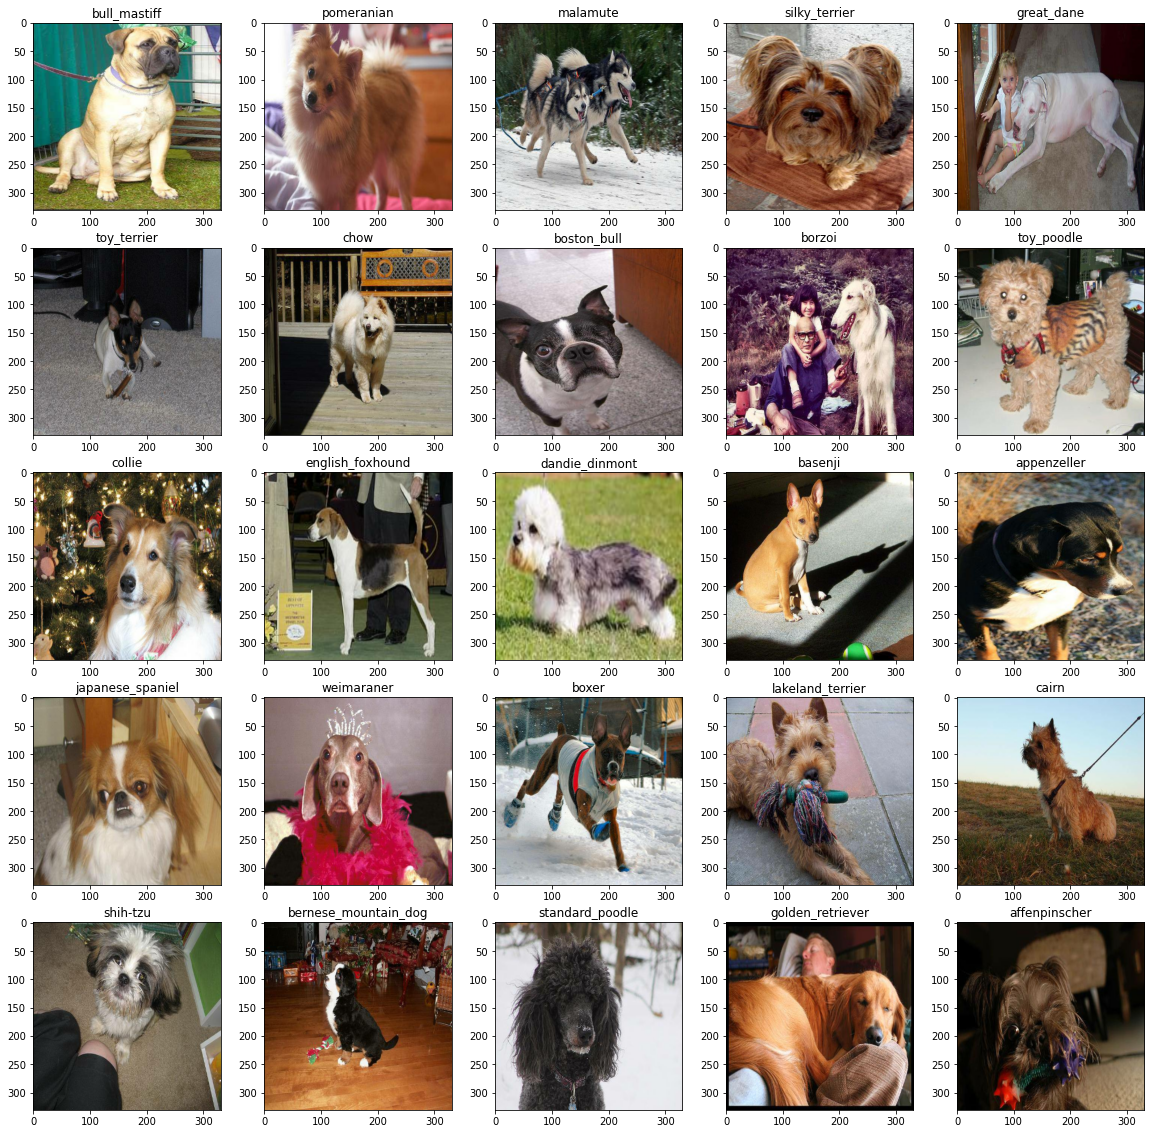

In [ ]:
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(x[i].numpy()) # .astype('int32') ---> as imshow() needs integer data to read the image

In [ ]:
early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)
checkpoint = ModelCheckpoint(filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5',
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# early = tf.keras.callbacks.EarlyStopping( patience=2,
#                                           min_delta=0.001,
#                                           restore_best_weights=True)
# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)
# checkpoint = ModelCheckpoint(filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5',
#                              monitor='val_loss',
#                              verbose=1, 
#                              save_best_only=True,
#                              mode='min')

In [ ]:
# model = tf.keras.models.load_model('my_best_model.epoch01-loss0.20.hdf5')

In [ ]:
history=model.fit(
    x=get_dataset(train_filenames, batch_size),
    epochs=10,
    steps_per_epoch=10,
    validation_data=get_dataset(test_filenames, 16),
    callbacks=[EarlyStop,checkpoint,lrr])
    



Epoch 1/10
10/10 [==============================] - 1630s 174s/step - loss: 4.3189 - accuracy: 0.2188 - auc_2: 0.5553 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - val_loss: 3.6598 - val_accuracy: 0.4389 - val_auc_2: 0.9178 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00

Epoch 00001: val_loss improved from inf to 3.65980, saving model to my_best_model.epoch01-loss3.66.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
10/10 [==============================] - 1629s 177s/step - loss: 3.0233 - accuracy: 0.5969 - auc_2: 0.9169 - recall_2: 0.0063 - precision_2: 1.0000 - val_loss: 2.2261 - val_accuracy: 0.7283 - val_auc_2: 0.9958 - val_recall_2: 0.0499 - val_precision_2: 0.9623

Epoch 00002: val_loss improved from 3.65980 to 2.22609, saving model to my_best_model.epoch02-loss2.23.hdf5
Epoch 3/10
10/10 [==============================] - 1605s 174s/step - loss: 1.7105 - accuracy: 0.8062 - auc_2: 0.9139 - recall_2: 0.1719 - precision_2: 0.9821 - val_loss: 1.2144 - val_accuracy: 0.8622 - val_auc_2: 0.9985 - val_recall_2: 0.3685 - val_precision_2: 0.9692

Epoch 00003: val_loss improved from 2.22609 to 1.21444, saving model to my_best_model.epoch03-loss1.21.hdf5
Epoch 4/10
10/10 [==============================] - 1580s 171s/step - loss: 0.9265 - accuracy: 0.9187 - auc_2: 0.9566 - recall_2: 0.4812 - precision_2: 0.9565 - val_loss: 0.6687 - val_accuracy: 0.8925 - val_auc_2: 0.9996 - val_recall_2: 0.678

In [ ]:
history.history

{'accuracy': [0.21875,
  0.596875011920929,
  0.8062499761581421,
  0.918749988079071,
  0.8999999761581421,
  0.921875,
  0.9156249761581421,
  0.9468749761581421,
  0.9156249761581421,
  0.9468749761581421],
 'auc_2': [0.5553116202354431,
  0.916913628578186,
  0.9138870239257812,
  0.9565712213516235,
  0.9244362115859985,
  0.906514585018158,
  0.9326702952384949,
  0.8656079769134521,
  0.9385808110237122,
  0.9581358432769775],
 'loss': [4.318859577178955,
  3.0233333110809326,
  1.7104841470718384,
  0.9264723658561707,
  0.6260179281234741,
  0.4009031653404236,
  0.39829808473587036,
  0.27767473459243774,
  0.3466889262199402,
  0.20900049805641174],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'precision_2': [0.0,
  1.0,
  0.9821428656578064,
  0.95652174949646,
  0.9467213153839111,
  0.9488054513931274,
  0.9358108043670654,
  0.9545454382896423,
  0.9346405267715454,
  0.9549839496612549],
 'recall_2': [0.0,
  0.0062500000931322575,
  0.

In [ ]:
score = model.evaluate(get_dataset(test_filenames, 16))
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

64/64 [==============================] - 1199s 19s/step - loss: 0.2338 - accuracy: 0.9374 - auc_2: 0.9993 - recall_2: 0.9208 - precision_2: 0.9593
Test loss: 0.23381081223487854 / Test accuracy: 0.9374389052391052


In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

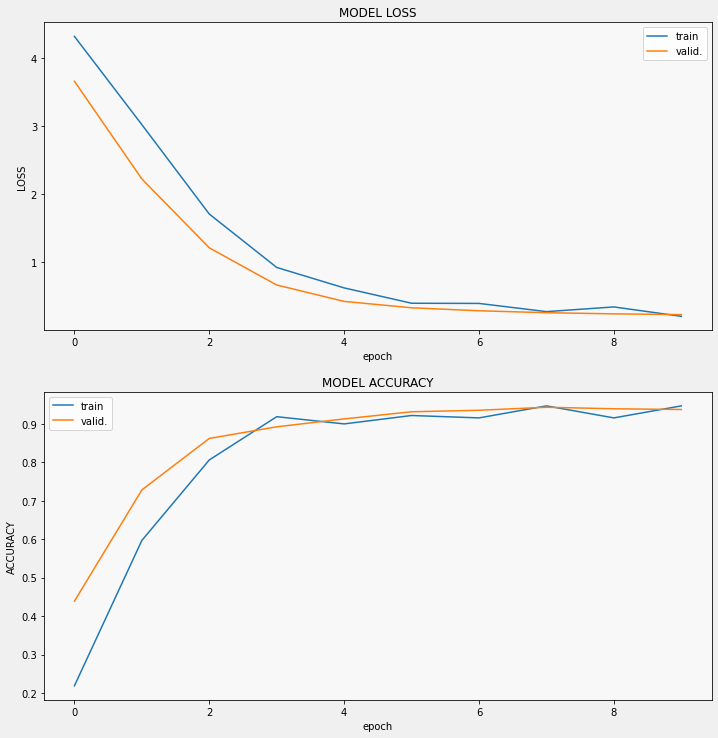

In [ ]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)

In [ ]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
#     y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
#         y[ix] = class_to_num[dog_breed]
    
    y = tf.keras.utils.to_categorical(y)
    
    return images,y

In [ ]:
import glob, os
img = []
for file in glob.glob("data/test/*.jpg"):
    img.append(file)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [ ]:
def create_img(img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # 
    return img_array
#     b=images[0]
#     a=np.array(images[0])
#     aa=np.expand_dims(a,axis=0).shape
#     aa=np.array(aa)
#     b = np.vstack([x])


In [ ]:
# img_ = load_img(file,target_size= (331,331,3))
# img_=create_img(img_)
# img_.shape
# predictions = model.predict(img_)
# predictions

In [ ]:
col_names=[]
col_names =list(class_to_num.keys())
col_names.insert(0, "id")


In [ ]:
len(img)

10357

This code is used to make output.csv file 

In [ ]:
from keras.preprocessing.image import load_img
from tqdm import tqdm

images = np.zeros([len(img), 331,331,3],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
# col_names = ['id'+class_to_num.keys()]
arr=[]
for file in tqdm(img):
    arr_=[]
    img_ = load_img(file,target_size= (331,331,3))
    img_=create_img(img_)
    img_.shape
    predictions = model.predict(img_)
    temp=[(str(file[10:]).replace('.jpg', ""))]
    arr_=(temp+list(predictions[0]))
    arr.append(tuple(arr_))
    

    
    #     images[10:]=imgs
# my_data = pd.read_csv('output.csv')

my_data = pd.DataFrame(arr,
           columns=tuple(col_names)
                 )
my_data.set_index(['id'], inplace = True)
my_data.to_csv('output.csv')


 14%|█▍        | 1430/10357 [29:57<3:03:59,  1.24s/it]

In [ ]:
my_data.head()

In [ ]:
# img_array = tf.keras.preprocessing.image.img_to_array(x[0])
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])


In [ ]:
# score.numpy()

In [ ]:
# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_to_num[np.argmax(score)], 100 * np.max(score))
# )

In [ ]:
# np.argmax(score)

In [ ]:
# list(class_to_num.keys())[list(class_to_num.values()).index(np.argmax(score))]

In [ ]:
# plt.imshow(x[0]),np.argmax(y[0])


The probom I found in the code is not using image augmentation and droup out. As data is unbalanced